<a href="https://colab.research.google.com/github/salav2006poudyal2025/5CS037_ASSESMENT_3RD_2462257_SULAV_POUDYAL/blob/main/2462257_SulavPoudyal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SULAV POUDYAL                        
WLV_ID: 2462257        
COllEGE_ID: NP03CS4A240047          
SUBMITTED ON: 10TH FEB 2026

# Exploratory Data Analysis and Data Understanding


# Choosing a Dataset

The dataset selected for this classification task is the Road Traffic Accidents Dataset which contains 12,317 rows and 32 columns, originally collected from Addis Ababa, Ethiopia and was published later on Kaggle.

This dataset strongly aligns with UNSDG 11: Sustainable Cities and Communities because analyzing accident patterns and predicting accident severity directly contributes to safer transportation systems and informed urban planning.

The CSV file, downloaded from Kaggle, was uploaded to Google Drive and loaded using pandas.read_csv(), enabling cleaning, preprocessing, visualization, and model development.

The dataset was created from manual police accident reports collected between 2017 and 2020 by the Addis Ababa Sub City Police Departments as part of a Master’s research project and later published publicly by Bedane, Tarikwa Tesfa (2020) and included in the Kaggle records where it now appears with 32 well defined attributes describing accident conditions and severity levels.

The dataset was accessed through Kaggle, where it is publicly available under the title “Road Traffic Accident Dataset of Addis Ababa City,” providing open access to researchers and learners interested in understanding accident severity prediction and road safety analytics.

The dataset aligns with UNSDG 11 because it supports data driven improvement of urban mobility and road infrastructure.
It also indirectly supports UNSDG 3 (Good Health & Well Being) by helping reduce traffic injuries and fatalities and UNSDG 9 (Industry, Innovation & Infrastructure) by encouraging evidence based infrastructure development, making it both relevant and impactful for global sustainability goals.

The dataset includes a diverse set of attributes such as
driver demographics (age band, gender, educational level, driving experience), vehicle characteristics (vehicle type, service year, vehicle ownership), environmental conditions (lighting, weather, road surface), accident context (area of accident, type of collision, pedestrian movement, vehicle movement), and temporal details (day, month, time of day), culminating in the target variable Accident_severity which classifies crashes into Slight Injury, Serious Injury, or Fatal Injury.

Identifing meaningful questions that dataset can answer.

What behaviors cause severe crashes?  
Variables: Collision type, vehicle movement, causes  
Method: Analyze severity rates by behavior

Which driver/vehicle factors increase risk?  
Variables: Driver age, experience, vehicle type  
Method: Compare severity rates across groups

When do severe crashes happen most?  
Variables: Time of day, day of week  
Method: Calculate severity rates by time period

In [ ]:
# Standard libraries
import os
import re
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, math, textwrap, unicodedata
from IPython.display import display
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report
)
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE

# Exploratory Data Analysis (EDA)

Original dataset shape: (12316, 32)

First 5 rows:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3.0,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury



Last 5 rows:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,NaN,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3.0,Driver,Normal,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Changing lane to the right,Slight Injury



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Age_band_of_driver           10768 non-null  object 
 3   Sex_of_driver                12138 non-null  object 
 4   Educational_level            11475 non-null  object 
 5   Vehicle_driver_relation      11723 non-null  object 
 6   Driving_experience           11454 non-null  object 
 7   Type_of_vehicle              11366 non-null  object 
 8   Owner_of_vehicle             11834 non-null  object 
 9   Service_year_of_vehicle      5505 non-null   object 
 10  Defect_of_vehicle            7889 non-null   object 
 11  Area_accident_occured        12055 non-null  object 
 12  Lanes_or_Medians             11874 non-null  object 
 13  R

,Missing Count,Missing Percentage
Service_year_of_vehicle,6811,55.302046
Age_band_of_casualty,4443,36.075024
Casualty_severity,4443,36.075024
Casualty_class,4443,36.075024
Sex_of_casualty,4443,36.075024
Defect_of_vehicle,4427,35.945112
Work_of_casuality,3217,26.120494
Fitness_of_casuality,2635,21.394933
Age_band_of_driver,1548,12.569016
Types_of_Junction,1078,8.752842



Detected columns after coercion:
Categorical columns: ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
Numerical columns: ['Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_severity', 'hour']

Total remaining missing values after imputation: 0

Summary statistics for numerical columns:


,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,hour
count,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,2.933176,13.835823
std,0.688790,1.007179,0.258042,5.202923
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,3.000000,10.000000
50%,2.000000,1.000000,3.000000,15.000000
75%,2.000000,2.000000,3.000000,18.000000
max,7.000000,8.000000,3.000000,23.000000



Summary statistics for categorical columns (top 10 values each):

Time value counts (top 10) | Unique values: 1074


,count
Time,
15:30:00,120
17:10:00,110
18:30:00,103
11:30:00,99
17:00:00,98
16:00:00,97
18:00:00,95
19:00:00,94
17:50:00,88



Day_of_week value counts (top 10) | Unique values: 7


,count
Day_of_week,
Friday,2041
Thursday,1851
Wednesday,1840
Tuesday,1770
Monday,1681
Saturday,1666
Sunday,1467



Age_band_of_driver value counts (top 10) | Unique values: 4


,count
Age_band_of_driver,
18-30,5819
31-50,4087
Over 51,1585
Under 18,825



Sex_of_driver value counts (top 10) | Unique values: 2


,count
Sex_of_driver,
Male,11615
Female,701



Educational_level value counts (top 10) | Unique values: 6


,count
Educational_level,
Junior high school,8460
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Illiterate,45



Vehicle_driver_relation value counts (top 10) | Unique values: 3


,count
Vehicle_driver_relation,
Employee,10220
Owner,1973
Other,123



Driving_experience value counts (top 10) | Unique values: 6


,count
Driving_experience,
5-10yr,4225
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118



Type_of_vehicle value counts (top 10) | Unique values: 17


,count
Type_of_vehicle,
Automobile,4155
Lorry (41-100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11-40Q),541
Public (13-45 seats),532
Public (> 45 seats),404



Owner_of_vehicle value counts (top 10) | Unique values: 4


,count
Owner_of_vehicle,
Owner,10941
Governmental,1041
Organization,312
Other,22



Service_year_of_vehicle value counts (top 10) | Unique values: 5


,count
Service_year_of_vehicle,
2-5yrs,8603
Above 10yr,1324
5-10yrs,1280
1-2yr,827
Below 1yr,282



Defect_of_vehicle value counts (top 10) | Unique values: 2


,count
Defect_of_vehicle,
No defect,12204
Other,112



Area_accident_occured value counts (top 10) | Unique values: 11


,count
Area_accident_occured,
Other,4100
Office areas,3451
Residential areas,2060
Church areas,1060
Industrial areas,456
School areas,415
Recreational areas,328
Outside rural areas,218
Hospital areas,121



Lanes_or_Medians value counts (top 10) | Unique values: 6


,count
Lanes_or_Medians,
Two-way (divided with broken lines road marking),4853
Undivided Two way,3796
other,1660
Double carriageway (median),1020
One way,845
Two-way (divided with solid lines road marking),142



Road_allignment value counts (top 10) | Unique values: 9


,count
Road_allignment,
Tangent road with flat terrain,10601
Tangent road with mild grade and flat terrain,501
Steep grade downward with mountainous terrain,429
Tangent road with mountainous terrain and,396
Gentle horizontal curve,163
Escarpments,113
Sharp reverse curve,57
Tangent road with rolling terrain,37
Steep grade upward with mountainous terrain,19



Types_of_Junction value counts (top 10) | Unique values: 7


,count
Types_of_Junction,
Y Shape,5621
No junction,3837
Crossing,2177
Other,445
O Shape,164
T Shape,60
X Shape,12



Road_surface_type value counts (top 10) | Unique values: 5


,count
Road_surface_type,
Asphalt roads,11468
Earth roads,358
Gravel roads,242
Other,167
Asphalt roads with some distress,81



Road_surface_conditions value counts (top 10) | Unique values: 4


,count
Road_surface_conditions,
Dry,9340
Wet or damp,2904
Snow,70
Flood over 3cm. deep,2



Light_conditions value counts (top 10) | Unique values: 4


,count
Light_conditions,
Daylight,8798
Darkness - lights lit,3286
Darkness - no lighting,192
Darkness - lights unlit,40



Weather_conditions value counts (top 10) | Unique values: 8


,count
Weather_conditions,
Normal,10355
Raining,1331
Other,296
Cloudy,125
Windy,98
Snow,61
Raining and Windy,40
Fog or mist,10



Type_of_collision value counts (top 10) | Unique values: 9


,count
Type_of_collision,
Vehicle with vehicle collision,8943
Collision with roadside objects,1786
Collision with pedestrians,896
Rollover,397
Collision with animals,171
Collision with roadside-parked vehicles,54
Fall from vehicles,34
Other,26
With Train,9



Vehicle_movement value counts (top 10) | Unique values: 12


,count
Vehicle_movement,
Going straight,8554
Moving Backward,985
Other,937
Reversing,563
Turnover,489
Getting off,339
Entering a junction,193
Overtaking,96
Stopping,61



Casualty_class value counts (top 10) | Unique values: 3


,count
Casualty_class,
Driver or rider,9387
Pedestrian,1649
Passenger,1280



Sex_of_casualty value counts (top 10) | Unique values: 2


,count
Sex_of_casualty,
Male,9696
Female,2620



Age_band_of_casualty value counts (top 10) | Unique values: 5


,count
Age_band_of_casualty,
18-30,7588
31-50,2455
Under 18,1035
Over 51,994
Unknown,244



Work_of_casuality value counts (top 10) | Unique values: 6


,count
Work_of_casuality,
Driver,9120
Self-employed,2044
Employee,553
Other,463
Student,103
Unemployed,33



Fitness_of_casuality value counts (top 10) | Unique values: 5


,count
Fitness_of_casuality,
Normal,12243
NormalNormal,19
Deaf,18
Other,18
Blind,18



Pedestrian_movement value counts (top 10) | Unique values: 8


,count
Pedestrian_movement,
Crossing from nearside - masked by parked or stationary vehicle,11727
Unknown or other,293
Crossing from driver's nearside,140
Crossing from offside - masked by parked or stationary vehicle,72
"In carriageway, stationary - not crossing (standing or playing)",46
"Walking along in carriageway, back to traffic",18
"In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle",13
"Walking along in carriageway, facing traffic",7



Cause_of_accident value counts (top 10) | Unique values: 19


,count
Cause_of_accident,
No distancing,2288
Changing lane to the right,1808
Changing lane to the left,1473
Driving carelessly,1402
No priority to vehicle,1207
Moving Backward,1137
No priority to pedestrian,721
Other,456
Overtaking,430



Accident_severity value counts (top 10) | Unique values: 3


,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


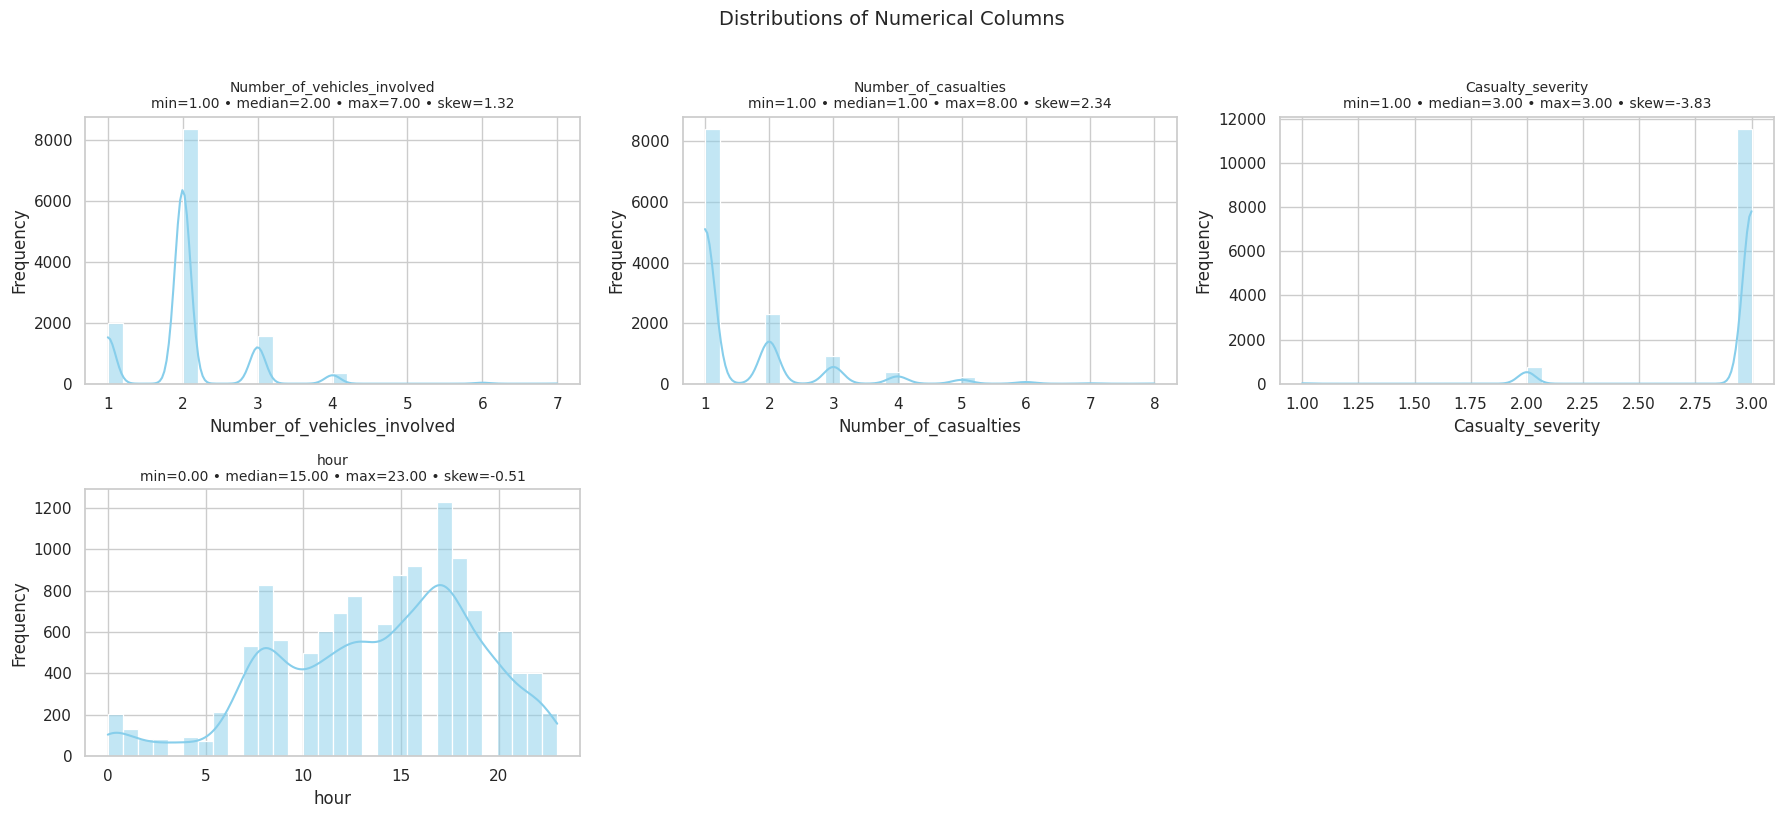

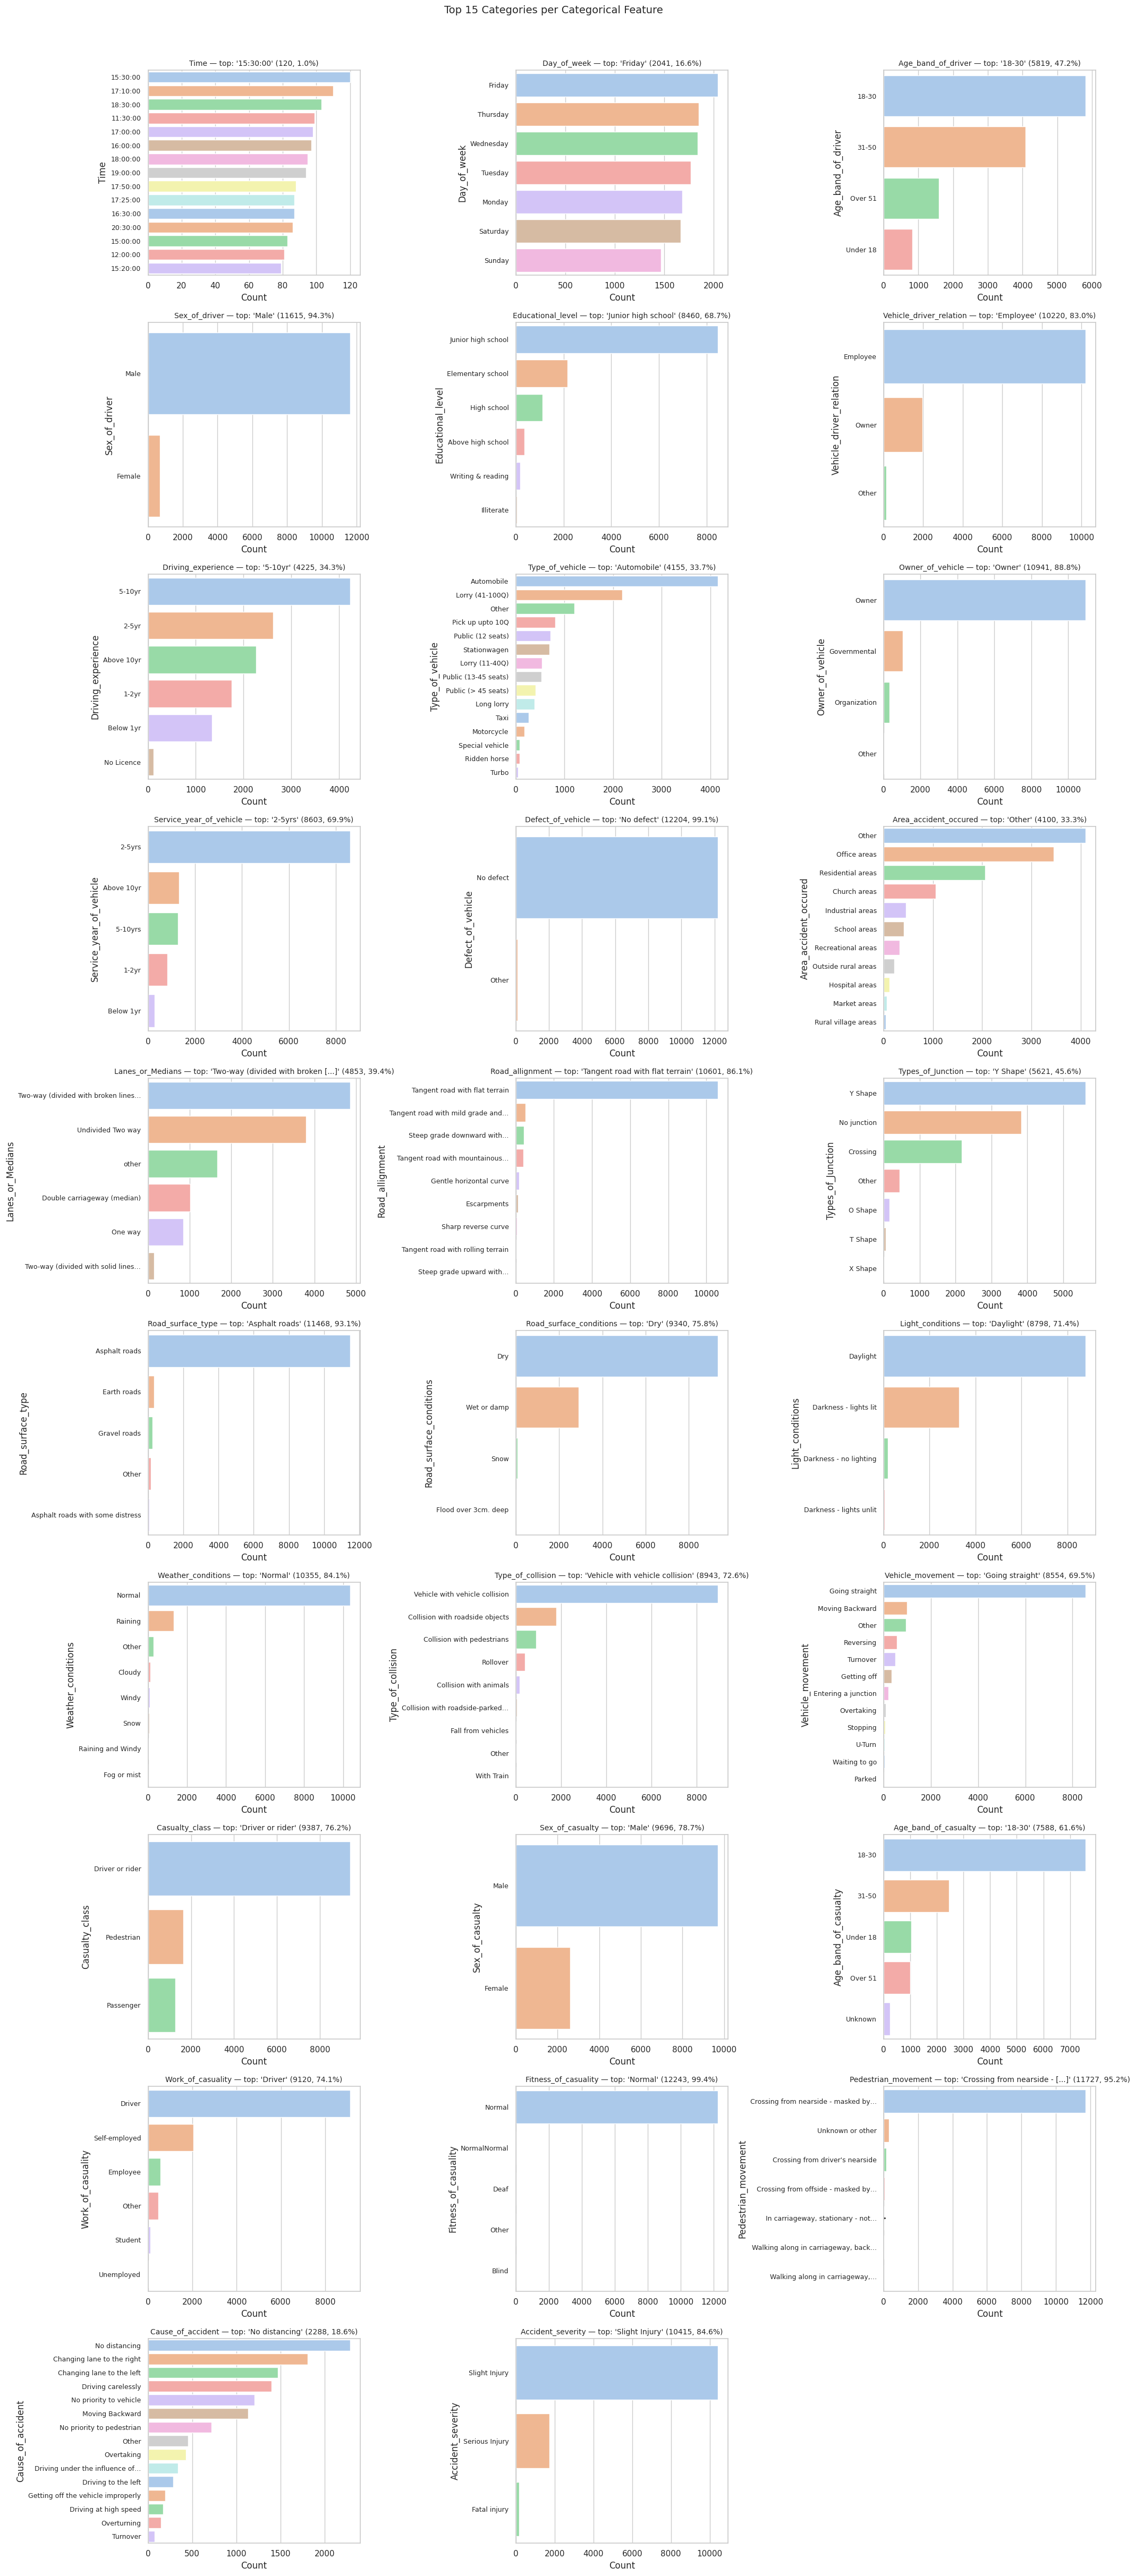

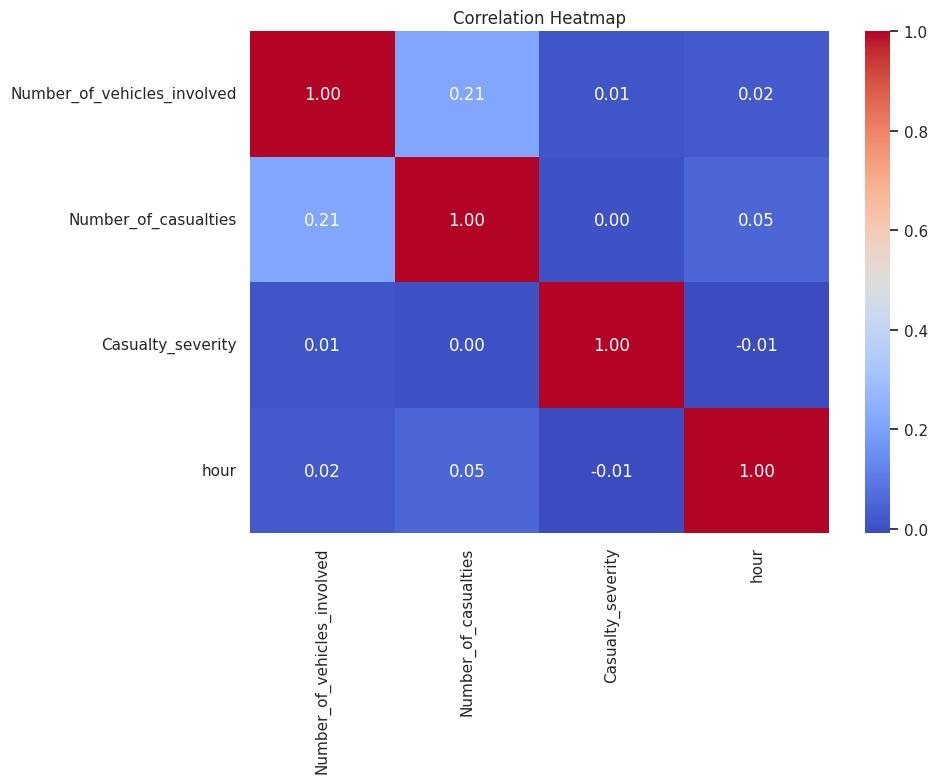


[Insight] Top correlated pairs (absolute):
  - Number_of_vehicles_involved vs Number_of_casualties: 0.21
  - Number_of_casualties vs hour: 0.05
  - Number_of_vehicles_involved vs hour: 0.02
  - Number_of_vehicles_involved vs Casualty_severity: 0.01
  - Casualty_severity vs hour: 0.01

Missing values per column after cleaning:


,Missing Count,Missing Percentage
Time,0,0.0
Day_of_week,0,0.0
Age_band_of_driver,0,0.0
Sex_of_driver,0,0.0
Educational_level,0,0.0
Vehicle_driver_relation,0,0.0
Driving_experience,0,0.0
Type_of_vehicle,0,0.0
Owner_of_vehicle,0,0.0
Service_year_of_vehicle,0,0.0



Number of duplicate rows after cleaning: 0
Number of duplicate columns after cleaning: 0

Cleaned dataset saved successfully at: /content/drive/MyDrive/Colab Notebooks/Classification_Road_Traffic_Accidents_cleaned.csv


In [ ]:
# Better readability in notebooks
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

sns.set_theme(style="whitegrid")

# Paths

RAW_PATH    = '/content/drive/MyDrive/Colab Notebooks/classification_Road_Traffic_Accidents.csv'
CLEAN_PATH  = '/content/drive/MyDrive/Colab Notebooks/Classification_Road_Traffic_Accidents_cleaned.csv'

# Helper functions
def normalize_text_series(s: pd.Series, na_tokens=None) -> pd.Series:
    """
    Unicode-normalize + standardize punctuation + trim spaces for an object/string Series.
    Re-applies NA tokens after normalization to catch empty strings etc.
    """
    if na_tokens is None:
        na_tokens = ["na","NA","N/A","None","none","Unknown","unknown","","-","—","–","nan","NaN"]
    s = s.astype("string")
    s = s.apply(lambda x: (
        unicodedata.normalize("NFKC", x)
        .replace("—", "-")
        .replace("–", "-")
        .replace("’", "'")
        .replace("“", '"')
        .replace("”", '"')
        if x is not pd.NA else x
    ))
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()
    s = s.replace(na_tokens, pd.NA)  # re-apply NA tokens after cleanup
    return s

def safe_display(obj, title=None, head=None):
    """Pretty print/display helper for notebooks & scripts."""
    if title:
        print(f"\n{title}")
    if isinstance(obj, pd.DataFrame) and head:
        display(obj.head(head))
    else:
        try:
            display(obj)
        except Exception:
            print(obj)

# Load dataset (with robust NA mapping)
na_tokens = ["na","NA","N/A","None","none","Unknown","unknown","","-","—","–","nan","NaN"]
df = pd.read_csv(
    RAW_PATH,
    low_memory=False,
    na_values=na_tokens,
    keep_default_na=False  # we control NA tokens explicitly
)
print(f"Original dataset shape: {df.shape}")

# Preview the dataset
print("\nFirst 5 rows:")
safe_display(df.head(5))

print("\nLast 5 rows:")
safe_display(df.tail(5))

print("\nDataset info:")
df.info()

print("\nColumn names and data types:")
print(df.dtypes)

# Check for duplicate rows
duplicate_rows_initial = df.duplicated().sum()
print(f"\nNumber of duplicate rows before cleaning: {duplicate_rows_initial}")

# Check for missing values (pre-clean)
missing_values_initial = df.isna().sum()
missing_percentage_initial = (missing_values_initial / len(df)) * 100

missing_df_initial = (
    pd.DataFrame({
        'Missing Count': missing_values_initial,
        'Missing Percentage': missing_percentage_initial
    })
    .sort_values(by='Missing Count', ascending=False)
)
print("\nMissing values per column before cleaning:")
safe_display(missing_df_initial)

# Normalize text in all object/string columns
obj_like_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
for col in obj_like_cols:
    df[col] = normalize_text_series(df[col], na_tokens=na_tokens)

# --- Domain-specific categorical fixes ---
# Fix "?" in ranges like "Lorry (41?100Q)" or "Public (13?45 seats)" -> clean hyphen
if 'Type_of_vehicle' in df.columns:
    df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(
        r"\((\d+)\?(\d+)\s*Q\)", r"(\1-\2Q)", regex=True
    )
    df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(
        r"\((\d+)\?(\d+)\s*seats\)", r"(\1-\2 seats)", regex=True
    )

# Clean Pedestrian_movement entries concatenated with "Not a Pedestrian"
if 'Pedestrian_movement' in df.columns:
    pm = df['Pedestrian_movement'].astype('string')
    pm = pm.str.replace("Not a Pedestrian", "", regex=False)
    pm = pm.str.replace(r"statio\s*ry|statio\s*Not a Pedestrian\s*ry", "stationary", regex=True)
    pm = pm.str.replace(r"\s+", " ", regex=True).str.strip()
    pm = pm.replace(r"^\s*$", pd.NA, regex=True)  # empty -> NaN
    df['Pedestrian_movement'] = pm

# Replace merged category with umbrella label
if 'Area_accident_occured' in df.columns:
    df['Area_accident_occured'] = df['Area_accident_occured'].str.replace(
        "Rural village areasOffice areas", "Other", regex=False
    )

# Replace stray numeric tokens in label columns with "Other"/"Unknown"
if 'Defect_of_vehicle' in df.columns:
    df['Defect_of_vehicle'] = df['Defect_of_vehicle'].apply(
        lambda x: "Other" if isinstance(x, str) and x.strip().isdigit() else x
    )
if 'Age_band_of_casualty' in df.columns:
    df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace({"5": "Unknown"})

# Convert numeric-like text columns (if >=90% numeric)
#    (INCLUDES both 'object' and 'string' dtypes)
for col in df.select_dtypes(include=['object', 'string']).columns:
    test = pd.to_numeric(df[col], errors='coerce')
    non_na_ratio = 1 - test.isna().mean()
    if non_na_ratio >= 0.90:
        df[col] = test

# Derive hour from Time; order Day_of_week (helps EDA)
if 'Time' in df.columns:
    dt = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df['hour'] = dt.dt.hour

if 'Day_of_week' in df.columns:
    day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=day_order, ordered=True)

# Separate columns by type
categorical_cols = df.select_dtypes(include=['object', 'string', 'category']).columns.tolist()
numerical_cols   = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nDetected columns after coercion:")
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# 9) Handle missing values (median for numeric, mode/Unknown for categorical)
for col in numerical_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    mode_series = df[col].mode(dropna=True)
    if not mode_series.empty:
        df[col] = df[col].fillna(mode_series.iloc[0])
    else:
        df[col] = df[col].fillna('Unknown')

# Confirm no missing values remain
remaining_na = int(df.isna().sum().sum())
print(f"\nTotal remaining missing values after imputation: {remaining_na}")
assert remaining_na == 0, "There are still missing values!"

# Summary statistics
print("\nSummary statistics for numerical columns:")
if numerical_cols:
    safe_display(df[numerical_cols].describe())
else:
    print("No numerical columns detected after coercion.")

print("\nSummary statistics for categorical columns (top 10 values each):")
for col in categorical_cols:
    print(f"\n{col} value counts (top 10) | Unique values: {df[col].nunique()}")
    safe_display(df[col].value_counts().head(10))

# Visualizations

# Plot ALL numerical distributions in ONE figure (grid) with quick insights
num_cols_plot = [c for c in numerical_cols if df[c].nunique() > 2]
if num_cols_plot:
    NCOLS = 3
    NROWS = math.ceil(len(num_cols_plot) / NCOLS)
    fig, axes = plt.subplots(NROWS, NCOLS, figsize=(6*NCOLS, 4*NROWS))
    axes = np.atleast_1d(axes).ravel()

    for ax, col in zip(axes, num_cols_plot):
        col_min = df[col].min(); col_max = df[col].max()
        col_median = df[col].median(); col_skew = df[col].skew()
        ax.set_title(f"{col}\nmin={col_min:.2f} • median={col_median:.2f} • max={col_max:.2f} • skew={col_skew:.2f}", fontsize=10)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=ax)
        ax.set_xlabel(col); ax.set_ylabel('Frequency')

    for j in range(len(num_cols_plot), len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle("Distributions of Numerical Columns", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("\n[Info] Skipped numerical distribution grid (need numeric columns with >2 unique values).")

# Plot ALL categorical counts (top 15) in ONE figure (grid) with quick insights
cat_cols_plot = categorical_cols[:]  # you can subset if this is too many
if cat_cols_plot:
    NCOLS = 3
    NROWS = math.ceil(len(cat_cols_plot) / NCOLS)
    fig, axes = plt.subplots(NROWS, NCOLS, figsize=(7*NCOLS, 4.8*NROWS))
    axes = np.atleast_1d(axes).ravel()

    for ax, col in zip(axes, cat_cols_plot):
        order = df[col].value_counts().head(15)
        if order.empty:
            ax.axis('off')
            continue
        top_cat, top_cnt = order.index[0], int(order.iloc[0])
        top_share = top_cnt / len(df) * 100

        sns.barplot(
            x=order.values,
            y=[textwrap.shorten(str(x), width=35, placeholder='…') for x in order.index],
            palette='pastel',
            ax=ax
        )
        ax.set_title(
            f"{col} — top: '{textwrap.shorten(str(top_cat), 35)}' "
            f"({top_cnt}, {top_share:.1f}%)",
            fontsize=10
        )
        ax.set_xlabel('Count'); ax.set_ylabel(col)
        for tick in ax.get_yticklabels():
            tick.set_fontsize(9)

    for j in range(len(cat_cols_plot), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Top 15 Categories per Categorical Feature", y=1.01, fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("\n[Info] No categorical columns to plot.")

# Correlation heatmap for numerical columns + top pairs
if len(numerical_cols) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df[numerical_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    # strongest pairs (abs corr)
    abs_corr = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    top_pairs = (
        abs_corr.stack().sort_values(ascending=False).head(5)
        if not abs_corr.stack().empty else pd.Series(dtype=float)
    )
    if not top_pairs.empty:
        print("\n[Insight] Top correlated pairs (absolute):")
        for (c1, c2), v in top_pairs.items():
            print(f"  - {c1} vs {c2}: {v:.2f}")
else:
    print("\n[Info] Skipped correlation heatmap (need at least 2 numerical columns).")

# Final missing values check
missing_values_final = df.isna().sum()
missing_percentage_final = (missing_values_final / len(df)) * 100
missing_df_final = (
    pd.DataFrame({
        'Missing Count': missing_values_final,
        'Missing Percentage': missing_percentage_final
    })
    .sort_values(by='Missing Count', ascending=False)
)

print("\nMissing values per column after cleaning:")
safe_display(missing_df_final)

# Remove duplicate rows and columns
duplicate_rows_final = df.duplicated().sum()
print(f"\nNumber of duplicate rows after cleaning: {duplicate_rows_final}")
if duplicate_rows_final > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

duplicate_cols = df.columns.duplicated().sum()
print(f"Number of duplicate columns after cleaning: {duplicate_cols}")
if duplicate_cols > 0:
    df = df.loc[:, ~df.columns.duplicated()]
    print("Duplicate columns removed.")

# Save cleaned dataset
df_clean = df.copy()
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"\nCleaned dataset saved successfully at: {CLEAN_PATH}")

# Build a Neural Network Model


In [ ]:
# Load cleaned dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/Classification_Road_Traffic_Accidents_cleaned.csv'
df = pd.read_csv(data_path)

# Define features and target
target_col = 'Accident_severity'
assert target_col in df.columns, f"Target column '{target_col}' not found!"

# Drop any rows where the target is missing
df = df.dropna(subset=[target_col]).reset_index(drop=True)

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col].astype(str)  # Ensure target is string for LabelEncoder

# Encode target labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g 'Minor'=0, 'Serious'=1, etc.

# One-hot encode categorical features in X
X_encoded = pd.get_dummies(X, drop_first=True)  # Avoid dummy variable trap

# Split data into training and test sets
# 80% training, 20% test
# Stratify ensures class distribution remains same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Feature scaling
# Neural networks perform better with standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to train data
X_test_scaled = scaler.transform(X_test)        # Apply same transformation to test data

# Build Neural Network Model
"""
Neural Network Architecture:
- Input layer: number of input features (auto-determined by X_train_scaled)
- Hidden Layer 1: 64 neurons, ReLU activation
- Hidden Layer 2: 32 neurons, ReLU activation
- Output layer: number of classes (softmax internally for multi-class classification)

Loss Function:
- Multinomial cross-entropy (log-loss), handled internally by MLPClassifier

Optimizer:
- Adam optimizer with adaptive learning rate

Regularization:
- L2 penalty (alpha) to reduce overfitting

Early Stopping:
- Stops training if validation score doesn't improve after n_iter_no_change epochs
"""
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),    # Two hidden layers: 64 & 32 neurons
    activation='relu',              # ReLU activation for hidden layers
    solver='adam',                  # Adam optimizer (adaptive learning rate)
    learning_rate='adaptive',       # Adjust learning rate during training
    learning_rate_init=1e-3,        # Initial learning rate
    alpha=1e-3,                     # L2 regularization strength
    max_iter=300,                   # Max epochs
    early_stopping=True,            # Stop early if validation doesn't improve
    validation_fraction=0.1,        # 10% of training used for validation
    n_iter_no_change=10,            # Stop if no improvement for 10 epochs
    random_state=42
)

#  Train the Neural Network
mlp_model.fit(X_train_scaled, y_train)  # Fit model to training data

# Make predictions
y_train_pred = mlp_model.predict(X_train_scaled)  # Predictions on training set
y_test_pred = mlp_model.predict(X_test_scaled)    # Predictions on test set

# Evaluate model performance
print("===== TRAINING SET PERFORMANCE =====")
print("Accuracy:", accuracy_score(y_train, y_train_pred))  # Overall accuracy
print(classification_report(
    y_train,
    y_train_pred,
    target_names=label_encoder.classes_,  # Decode class labels
    digits=4,
    zero_division=0
))

print("\n===== TEST SET PERFORMANCE =====")
print("Accuracy:", accuracy_score(y_test, y_test_pred))  # Overall accuracy
print(classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,  # Decode class labels
    digits=4,
    zero_division=0
))


===== TRAINING SET PERFORMANCE =====
Accuracy: 0.9634591961023142
                precision    recall  f1-score   support

  Fatal injury     0.9896    0.7480    0.8520       127
Serious Injury     0.9383    0.8178    0.8739      1394
 Slight Injury     0.9667    0.9911    0.9788      8331

      accuracy                         0.9635      9852
     macro avg     0.9649    0.8523    0.9016      9852
  weighted avg     0.9630    0.9635    0.9623      9852


===== TEST SET PERFORMANCE =====
Accuracy: 0.8425324675324676
                precision    recall  f1-score   support

  Fatal injury     0.5294    0.2903    0.3750        31
Serious Injury     0.4701    0.3152    0.3774       349
 Slight Injury     0.8843    0.9391    0.9109      2084

      accuracy                         0.8425      2464
     macro avg     0.6279    0.5149    0.5544      2464
  weighted avg     0.8212    0.8425    0.8286      2464



# Build Primary Models

In [ ]:

# Load cleaned dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/Classification_Road_Traffic_Accidents_cleaned.csv'
df = pd.read_csv(data_path)

# Define features (X) and target (y)
target_col = 'Accident_severity'
assert target_col in df.columns, f"Target column '{target_col}' not found."

# Drop rows with missing target values
df = df.dropna(subset=[target_col]).reset_index(drop=True)

# Separate input features and target
X = df.drop(columns=[target_col])
y = df[target_col].astype(str).str.strip()  # Ensure string type and remove extra spaces

# Encode target labels into integers for ML models
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g., 'Minor'=0, 'Serious'=1

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical features to numeric

# Train-test split
# Use 80% for training and 20% for testing
# Stratify ensures same class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Feature scaling
# Logistic Regression benefits from feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data
X_test_scaled  = scaler.transform(X_test)       # Apply same transformation to test data

# Decision Tree does NOT require scaling

# Build models
# Logistic Regression: linear model with L2 regularization
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Decision Tree: non-linear, tree-based classifier
decision_tree = DecisionTreeClassifier(random_state=42)  # Optionally set max_depth to control overfitting

# Train models
log_reg.fit(X_train_scaled, y_train)  # Train Logistic Regression on scaled features
decision_tree.fit(X_train, y_train)   # Train Decision Tree on raw features

# Make predictions
# Logistic Regression predictions
lr_train_pred = log_reg.predict(X_train_scaled)
lr_test_pred  = log_reg.predict(X_test_scaled)

# Decision Tree predictions
dt_train_pred = decision_tree.predict(X_train)
dt_test_pred  = decision_tree.predict(X_test)

# Evaluate model performance
print("===== Logistic Regression =====")
print("Train Accuracy:", accuracy_score(y_train, lr_train_pred))  # Accuracy on training data
print("Test  Accuracy:", accuracy_score(y_test,  lr_test_pred))   # Accuracy on test data
print(classification_report(
    y_test, lr_test_pred, target_names=label_encoder.classes_, digits=4, zero_division=0
))

print("\n===== Decision Tree =====")
print("Train Accuracy:", accuracy_score(y_train, dt_train_pred))
print("Test  Accuracy:", accuracy_score(y_test,  dt_test_pred))
print(classification_report(
    y_test, dt_test_pred, target_names=label_encoder.classes_, digits=4, zero_division=0
))

# Compare models and select the best
# Use Macro F1 score as metric to handle class imbalance
lr_f1_macro = f1_score(y_test, lr_test_pred, average='macro', zero_division=0)
dt_f1_macro = f1_score(y_test, dt_test_pred, average='macro', zero_division=0)

if lr_f1_macro > dt_f1_macro:
    print("\nBest Model: Logistic Regression")
    print(f"Justification: Higher Macro F1 on the test set "
          f"(LR={lr_f1_macro:.4f} vs DT={dt_f1_macro:.4f}).")
else:
    print("\nBest Model: Decision Tree")
    print(f"Justification: Higher Macro F1 on the test set "
          f"(DT={dt_f1_macro:.4f} vs LR={lr_f1_macro:.4f}).")


===== Logistic Regression =====
Train Accuracy: 0.8774868047097036
Test  Accuracy: 0.8336038961038961
                precision    recall  f1-score   support

  Fatal injury     0.1842    0.2258    0.2029        31
Serious Injury     0.4586    0.2063    0.2846       349
 Slight Injury     0.8704    0.9477    0.9074      2084

      accuracy                         0.8336      2464
     macro avg     0.5044    0.4599    0.4650      2464
  weighted avg     0.8035    0.8336    0.8103      2464


===== Decision Tree =====
Train Accuracy: 1.0
Test  Accuracy: 0.8624188311688312
                precision    recall  f1-score   support

  Fatal injury     0.5769    0.4839    0.5263        31
Serious Injury     0.5560    0.4413    0.4920       349
 Slight Injury     0.9051    0.9386    0.9216      2084

      accuracy                         0.8624      2464
     macro avg     0.6793    0.6212    0.6466      2464
  weighted avg     0.8515    0.8624    0.8557      2464


Best Model: Decision Tree

# Hyper-parameter Optimization with Cross-Validation


In [ ]:
# Load cleaned dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/Classification_Road_Traffic_Accidents_cleaned.csv'
df = pd.read_csv(data_path)

# Define features and target
target_col = 'Accident_severity'

# Separate input features and target
X = df.drop(columns=[target_col])
y = df[target_col].astype(str)  # Ensure target is string type

# Encode target labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g., 'Minor'=0, 'Serious'=1

# One-hot encode categorical features in X
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical features to numeric

# Train-test split
# 80% training, 20% testing, stratify ensures class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Pipelines
# Pipelines allow chaining preprocessing and model together
# This ensures proper scaling only applied to training data within cross-validation folds

# Logistic Regression pipeline: scaling + classifier
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),                     # Standardize features for LR
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Decision Tree pipeline: classifier only (scaling not needed)
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grids
# Logistic Regression: regularization strength 'C'
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10]  # Smaller C = stronger regularization
}

# Decision Tree: control tree depth and minimum samples per split
param_grid_dt = {
    'clf__max_depth': [None, 5, 10, 20],           # None = unlimited depth
    'clf__min_samples_split': [2, 5, 10]           # Minimum samples to split an internal node
}

# Setup GridSearchCV with 5-fold cross-validation
# GridSearchCV will try all combinations of hyperparameters and report the best based on CV score
grid_lr = GridSearchCV(
    pipe_lr,
    param_grid_lr,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Use accuracy as evaluation metric
    n_jobs=-1                 # Use all CPU cores
)

grid_dt = GridSearchCV(
    pipe_dt,
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Run GridSearch (find best hyperparameters)
grid_lr.fit(X_train, y_train)  # Train Logistic Regression with CV
grid_dt.fit(X_train, y_train)  # Train Decision Tree with CV

# Report best hyperparameters & cross-validation scores
print("===== Logistic Regression =====")
print("Best CV Accuracy:", grid_lr.best_score_)           # Mean CV accuracy of best hyperparameters
print("Best Hyperparameters:", grid_lr.best_params_)     # Optimal 'C' value

print("\n===== Decision Tree =====")
print("Best CV Accuracy:", grid_dt.best_score_)
print("Best Hyperparameters:", grid_dt.best_params_)     # Optimal max_depth and min_samples_split


===== Logistic Regression =====
Best CV Accuracy: 0.8437874561857595
Best Hyperparameters: {'clf__C': 0.01}

===== Decision Tree =====
Best CV Accuracy: 0.8502834758825302
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 5}


# Feature Selection

In [ ]:
np.random.seed(42)  # For reproducibility

# Load cleaned dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/Classification_Road_Traffic_Accidents_cleaned.csv'
assert os.path.exists(data_path), f"File not found: {data_path}"
df = pd.read_csv(data_path)

# Define target & features
target_col = 'Accident_severity'
df = df.dropna(subset=[target_col]).reset_index(drop=True)

y = df[target_col].astype(str).str.strip()  # Ensure clean string target
X = df.drop(columns=[target_col])

# Separate categorical and numerical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Encode categorical features and scale numeric features
# OneHotEncoder for categoricals
ohe_kwargs = {'handle_unknown': 'ignore', 'sparse_output': False}  # Dense array output
if len(cat_cols) > 0:
    ohe = OneHotEncoder(**ohe_kwargs)
    X_train_cat = ohe.fit_transform(X_train[cat_cols])
    X_test_cat  = ohe.transform(X_test[cat_cols])
    cat_feature_names = ohe.get_feature_names_out(cat_cols).astype(str)
else:
    X_train_cat = np.empty((len(X_train), 0))
    X_test_cat  = np.empty((len(X_test), 0))
    cat_feature_names = np.array([], dtype=str)

# StandardScaler for numeric features
if len(num_cols) > 0:
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num  = scaler.transform(X_test[num_cols])
    num_feature_names = np.array(num_cols, dtype=str)
else:
    X_train_num = np.empty((len(X_train), 0))
    X_test_num  = np.empty((len(X_test), 0))
    num_feature_names = np.array([], dtype=str)

# Combine categorical + numeric features
X_train_proc = np.hstack([X_train_cat, X_train_num])
X_test_proc  = np.hstack([X_test_cat, X_test_num])
feat_names   = np.concatenate([cat_feature_names, num_feature_names])

# Wrap in DataFrames for easier column selection
train_df = pd.DataFrame(X_train_proc, columns=feat_names)
test_df  = pd.DataFrame(X_test_proc,  columns=feat_names)

# Feature Selection Methods
top_k = min(20, X_train_proc.shape[1])  # Keep top 20 features

# Filter method: Mutual Information (model-agnostic)
mi_scores = mutual_info_classif(X_train_proc, y_train, random_state=42)
mi_df = pd.DataFrame({'Feature': feat_names, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
selected_features_mi = mi_df.head(top_k)['Feature'].tolist()
X_train_mi = train_df[selected_features_mi].to_numpy()
X_test_mi  = test_df[selected_features_mi].to_numpy()

# Wrapper method: RFE with Logistic Regression (model-aligned)
lr_rfe_estimator = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced', random_state=42)
rfe = RFE(estimator=lr_rfe_estimator, n_features_to_select=top_k, step=0.1)
rfe.fit(X_train_proc, y_train)
rfe_mask = rfe.support_
selected_features_rfe = feat_names[rfe_mask].tolist()
X_train_rfe = X_train_proc[:, rfe_mask]
X_test_rfe  = X_test_proc[:,  rfe_mask]

# Embedded method: Random Forest feature importances (tree-aligned)
rf_emb = RandomForestClassifier(n_estimators=300, max_depth=20, class_weight='balanced', random_state=42, n_jobs=-1)
rf_emb.fit(X_train_proc, y_train)
importances = rf_emb.feature_importances_
feat_importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
selected_features_emb = feat_importance_df.head(top_k)['Feature'].tolist()
X_train_emb = train_df[selected_features_emb].to_numpy()
X_test_emb  = test_df[selected_features_emb].to_numpy()

# Assign feature subsets to models
# Logistic Regression → RFE-selected (wrapper method)
X_train_sel_lr = X_train_rfe
X_test_sel_lr  = X_test_rfe
lr_selected_feature_names = selected_features_rfe

# Decision Tree → RF-importance-selected (embedded method)
X_train_sel_dt = X_train_emb
X_test_sel_dt  = X_test_emb
dt_selected_feature_names = selected_features_emb

print(f"[INFO] Logistic Regression uses {len(lr_selected_feature_names)} RFE-selected features.")
print(f"[INFO] Decision Tree uses {len(dt_selected_feature_names)} RF-importance-selected features.")

# Retrain models on selected features
lr_fs = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced', random_state=42)
dt_fs = DecisionTreeClassifier(random_state=42)

lr_fs.fit(X_train_sel_lr, y_train)
dt_fs.fit(X_train_sel_dt, y_train)

# Evaluate on test set
def evaluate(name, model, X_te, y_te):
    y_pred = model.predict(X_te)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision (macro)": precision_score(y_te, y_pred, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_te, y_pred, average='macro', zero_division=0),
        "F1 (macro)": f1_score(y_te, y_pred, average='macro', zero_division=0),
        "Report": classification_report(y_te, y_pred, digits=4, zero_division=0)
    }

res_lr = evaluate("Logistic Regression (RFE-selected features)", lr_fs, X_test_sel_lr, y_test)
res_dt = evaluate("Decision Tree (RF-importance-selected features)", dt_fs, X_test_sel_dt, y_test)

print("\n===== Task 5 — Feature-Selection Retraining Results =====")
for res in (res_lr, res_dt):
    print(f"\n--- {res['Model']} ---")
    for k in ["Accuracy", "Precision (macro)", "Recall (macro)", "F1 (macro)"]:
        print(f"{k}: {res[k]:.4f}")
    print("\nClassification report:")
    print(res["Report"])

# Justification of method choices
print("\n=== Justification of Feature–Model Mapping ===")
print("* Logistic Regression → RFE: Wrapper method aligns selection with linear decision boundary.")
print("* Decision Tree → RF importances: Embedded method captures feature utility for tree splits and interactions.")


[INFO] Logistic Regression uses 20 RFE-selected features.
[INFO] Decision Tree uses 20 RF-importance-selected features.

===== Task 5 — Feature-Selection Retraining Results =====

--- Logistic Regression (RFE-selected features) ---
Accuracy: 0.1445
Precision (macro): 0.1160
Recall (macro): 0.4282
F1 (macro): 0.1635

Classification report:
                precision    recall  f1-score   support

  Fatal injury     0.2045    0.2903    0.2400        31
Serious Injury     0.1434    0.9943    0.2506       349
 Slight Injury     0.0000    0.0000    0.0000      2084

      accuracy                         0.1445      2464
     macro avg     0.1160    0.4282    0.1635      2464
  weighted avg     0.0229    0.1445    0.0385      2464


--- Decision Tree (RF-importance-selected features) ---
Accuracy: 0.7553
Precision (macro): 0.4706
Recall (macro): 0.4789
F1 (macro): 0.4736

Classification report:
                precision    recall  f1-score   support

  Fatal injury     0.2903    0.2903    0.

# Final Models and Comparative Analysis


In [ ]:
np.random.seed(42)  # Ensure reproducibility

# Preconditions
# Ensure Task 5 outputs exist:
#    • y_train, y_test
#    • RFE-selected features for LR
#    • RF-importance-selected features for DT
required_labels_ok = ('y_train' in globals()) and ('y_test' in globals())
if not required_labels_ok:
    raise RuntimeError("Run Task 5 first to produce y_train and y_test.")

# Helper to slice matrices by feature names
def build_matrix_from_features(X_train_proc, X_test_proc, feat_names, selected_features):
    idx_map = {f: i for i, f in enumerate(list(feat_names))}
    idx = [idx_map[f] for f in selected_features if f in idx_map]
    if len(idx) == 0:
        raise RuntimeError("Selected features produced empty index. Check Task 5 outputs.")
    return X_train_proc[:, idx], X_test_proc[:, idx]

# Prepare final training matrices
# Logistic Regression → RFE-selected
if 'X_train_rfe' in globals() and 'X_test_rfe' in globals():
    X_train_sel_lr = X_train_rfe
    X_test_sel_lr  = X_test_rfe
else:
    X_train_sel_lr, X_test_sel_lr = build_matrix_from_features(
        X_train_proc, X_test_proc, feat_names, selected_features_rfe
    )

# Decision Tree → RF-importance-selected
if 'X_train_emb' in globals() and 'X_test_emb' in globals():
    X_train_sel_dt = X_train_emb
    X_test_sel_dt  = X_test_emb
else:
    X_train_sel_dt, X_test_sel_dt = build_matrix_from_features(
        X_train_proc, X_test_proc, feat_names, selected_features_emb
    )

# Fetch best hyperparameters & CV scores from Task 4
best_lr_C = 1.0
best_dt_params = {'max_depth': None, 'min_samples_split': 2}
cv_acc_lr = None
cv_acc_dt = None

if 'grid_lr' in globals():
    best_lr_C = grid_lr.best_params_.get('clf__C', 1.0)
    cv_acc_lr = grid_lr.best_score_
if 'grid_dt' in globals():
    best_dt_params['max_depth'] = grid_dt.best_params_.get('clf__max_depth', None)
    best_dt_params['min_samples_split'] = grid_dt.best_params_.get('clf__min_samples_split', 2)
    cv_acc_dt = grid_dt.best_score_

# If CV scores unavailable, fallback: compute 5-fold CV on selected features
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
if cv_acc_lr is None:
    lr_cv_model = LogisticRegression(solver='lbfgs', C=best_lr_C, max_iter=1000, random_state=42)
    cv_acc_lr = float(np.mean(cross_val_score(lr_cv_model, X_train_sel_lr, y_train, scoring='accuracy', cv=cv, n_jobs=-1)))
if cv_acc_dt is None:
    dt_cv_model = DecisionTreeClassifier(
        max_depth=best_dt_params['max_depth'],
        min_samples_split=best_dt_params['min_samples_split'],
        random_state=42
    )
    cv_acc_dt = float(np.mean(cross_val_score(dt_cv_model, X_train_sel_dt, y_train, scoring='accuracy', cv=cv, n_jobs=-1)))

# Build final models with best hyperparameters
final_lr = LogisticRegression(solver='lbfgs', C=best_lr_C, max_iter=1000, random_state=42)
final_dt = DecisionTreeClassifier(
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    random_state=42
)

# Train final models on selected features
final_lr.fit(X_train_sel_lr, y_train)
final_dt.fit(X_train_sel_dt, y_train)

# Evaluation helper function
def evaluate_final_model(name, model, X_te, y_te, n_features, cv_acc):
    y_pred = model.predict(X_te)
    return {
        'Model': name,
        'Features Used': n_features,
        'CV Accuracy (Task 4)': cv_acc,
        'Accuracy (Test)': accuracy_score(y_te, y_pred),
        'Balanced Accuracy (Test)': balanced_accuracy_score(y_te, y_pred),
        'Precision (macro)': precision_score(y_te, y_pred, average='macro', zero_division=0),
        'Recall (macro)': recall_score(y_te, y_pred, average='macro', zero_division=0),
        'F1 (macro)': f1_score(y_te, y_pred, average='macro', zero_division=0),
        'Report': classification_report(y_te, y_pred, digits=4, zero_division=0)
    }

# Evaluate on test set
res_lr = evaluate_final_model(
    "Logistic Regression (RFE selected)",
    final_lr,
    X_test_sel_lr,
    y_test,
    X_train_sel_lr.shape[1],
    cv_acc_lr
)
res_dt = evaluate_final_model(
    "Decision Tree (RF-importance selected)",
    final_dt,
    X_test_sel_dt,
    y_test,
    X_train_sel_dt.shape[1],
    cv_acc_dt
)

# Print detailed classification reports
print("\n===== Logistic Regression (Final) =====")
print(res_lr['Report'])
print("\n===== Decision Tree (Final) =====")
print(res_dt['Report'])

# Comparative table
compare_cols = [
    'Model', 'Features Used', 'CV Accuracy (Task 4)',
    'Accuracy (Test)', 'Balanced Accuracy (Test)',
    'Precision (macro)', 'Recall (macro)', 'F1 (macro)'
]
results_final_df = pd.DataFrame([res_lr, res_dt])[compare_cols].sort_values(by='F1 (macro)', ascending=False)

print("\n=== Final Model Comparison (Test Set) ===")
print(results_final_df.to_string(index=False))



===== Logistic Regression (Final) =====
                precision    recall  f1-score   support

  Fatal injury     0.0000    0.0000    0.0000        31
Serious Injury     0.0000    0.0000    0.0000       349
 Slight Injury     0.8458    1.0000    0.9164      2084

      accuracy                         0.8458      2464
     macro avg     0.2819    0.3333    0.3055      2464
  weighted avg     0.7153    0.8458    0.7751      2464


===== Decision Tree (Final) =====
                precision    recall  f1-score   support

  Fatal injury     0.3600    0.2903    0.3214        31
Serious Injury     0.2641    0.2550    0.2595       349
 Slight Injury     0.8673    0.8748    0.8710      2084

      accuracy                         0.7796      2464
     macro avg     0.4971    0.4734    0.4840      2464
  weighted avg     0.7755    0.7796    0.7775      2464


=== Final Model Comparison (Test Set) ===
                                 Model  Features Used  CV Accuracy (Task 4)  Accuracy (Test